In [3]:
!pip install gensim==4.3.2

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   --- ------------------------------------ 1.8/24.0 MB 58.5 MB/s eta 0:00:01
   ---- ----------------------------------- 2.9/24.0 MB 46.6 MB/s eta 0:00:01
   ----- ---------------------------------- 3.5/24.0 MB 31.9 MB/s eta 0:00:01
   ------ --------------------------------- 3.6/24.0 MB 23.1 MB/s eta 0:00:01
   ------ --------------------------------- 3.6/24.0 MB 23.2 MB/s eta 0:00:01
   ------ --------------------------------- 3.9/24.0 MB 16.5 MB/s eta 0:00:02
   ------ --------------------------------- 4.1/24.0 MB 15.3 MB/s eta 0:00:02
   ------- -------------------------------- 4.2/24.0 MB 13.5 MB/s eta 0:00:02
   ------- -------------------------------- 4.4/24.0 MB 12.7 MB/s eta 0:00:02
   ------- -------------------------------- 4.5/24.0 MB 11.0 MB/s eta 0:00:02
   ------- -------------------------------- 4.6/24.0 MB 11.0 MB/s eta 0:00:02
   ------- -------------------------------- 4.8/24.0 MB 9.8 MB/s eta 0:0

In [4]:
import gensim

In [5]:
print(gensim.__version__)

4.3.2


In [7]:
!pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.5 MB 653.6 kB/s eta 0:00:03
   ---------------------------------------  1.5/1.5 MB 15.9 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 13.8 MB/s eta 0:00:00


In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Humane\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [19]:
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import re
from PIL import Image
from io import BytesIO
from nltk.tokenize import RegexpTokenizer
import nltk
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity

In [20]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/data.csv", filename="data.csv")
df = pd.read_csv("data.csv")
print('전체 문서 수: ', len(df))

전체 문서 수:  2382


In [21]:
df[:5]

,Unnamed: 0.1,Desc,Unnamed: 0,author,genre,image_link,rating,title
0,0,We know that power is shifting: From West to E...,0.0,Moisés Naím,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.63,The End of Power: From Boardrooms to Battlefie...
1,1,Following the success of The Accidental Billio...,1.0,Blake J. Harris,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.94,"Console Wars: Sega, Nintendo, and the Battle t..."
2,2,How to tap the power of social software and ne...,2.0,Chris Brogan,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.78,Trust Agents: Using the Web to Build Influence...
3,3,William J. Bernstein is an American financial ...,3.0,William J. Bernstein,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.20,The Four Pillars of Investing
4,4,Amazing book. And I joined Steve Jobs and many...,4.0,Akio Morita,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.05,Made in Japan: Akio Morita and Sony


In [23]:
#문자열 s를 받아 Ascii코드가 128 미만인 문자만을 유지
def _removeNonAscii(s):
    return "".join(i for i in s if ord(i)<128)

#문자열 text를 받아 소문자화
def make_lower_case(text):
    return text.lower()

#문자열 text를 받아 불용어(stop words) 제거
#불용어는 the, is, in같이 텍스트 분석에서 의미를 가지지 않는 단어들
def remove_stop_words(text):
    #문자열을 단어 단위로 분할
    text = text.split()
    #불용어 목록 stops를 가져오고 set함수를 이용해 목록을 집합으로 변환(검색 효율성 높임)
    stops = set(stopwords.words("english"))
    #단어 단위로 분할된 text를 순회하면서 각 단어 w가 stops에 속하지 않는 경우에만 리스트에 포함시킴
    text = [w for w in text if not w in stops]
    #불용어가 제거된 단어 리스트를 " " 공백을 기준으로 하나의 문자열로 합침
    text = " ".join(text)
    return text

def remove_html(text):
    #정규표현식을 사용해 html 태그 제거
    html_pattern = re.compile('<.*?>')
    #html 태그를 빈 문자열로 치환
    return html_pattern.sub(r'', text)

def remove_punctuation(text):
    #구두점 제거
    tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

#줄거리에 해당하는 Desc 열 지정, 전처리 과정
#df['cleaned']라는 객체 생성 후 .cleaned 명령어 사용
df['cleaned'] = df['Desc'].apply(_removeNonAscii)
df['cleaned'] = df.cleaned.apply(make_lower_case)
df['cleaned'] = df.cleaned.apply(remove_stop_words)
df['cleaned'] = df.cleaned.apply(remove_punctuation)
df['cleaned'] = df.cleaned.apply(remove_html)

In [24]:
df['cleaned'][:5]

0    know power shifting west east north south pres...
1    following success accidental billionaires mone...
2    tap power social software networks build busin...
3    william j bernstein american financial theoris...
4    amazing book joined steve jobs many akio morit...
Name: cleaned, dtype: object

In [25]:
#전처리 과정에서 빈 값이 생긴 행 제거
df['cleaned'].replace('', np.nan, inplace=True)
df = df[df['cleaned'].notna()]
print('전체 문서의 수: ', len(df))

전체 문서의 수:  2381


In [26]:
corpus = []
for words in df['cleaned']:
    corpus.append(words.split())

In [27]:
#Word2Vec 다운로드를 위한 gdrive 패키지 설치
!pip install gdown
!gdown https://drive.google.com/uc?id=1Av37IVBQAAntSe1X3MOAl5gvowQzd2_j

   ---------------------------------------- 0.0/147.9 kB ? eta -:--:--
   ---------------- ----------------------- 61.4/147.9 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 147.9/147.9 kB 2.2 MB/s eta 0:00:00


Downloading...
From (original): https://drive.google.com/uc?id=1Av37IVBQAAntSe1X3MOAl5gvowQzd2_j
From (redirected): https://drive.google.com/uc?id=1Av37IVBQAAntSe1X3MOAl5gvowQzd2_j&confirm=t&uuid=70b64aaa-53e1-4969-8837-1654a0311102
To: C:\Users\Humane\Documents\내꺼\GoogleNews-vectors-negative300.bin.gz

  0%|          | 0.00/1.65G [00:00<?, ?B/s]
  0%|          | 524k/1.65G [00:00<10:33, 2.60MB/s]
  0%|          | 2.62M/1.65G [00:00<02:44, 10.0MB/s]
  0%|          | 4.19M/1.65G [00:01<08:04, 3.39MB/s]
  0%|          | 5.77M/1.65G [00:01<06:01, 4.54MB/s]
  0%|          | 6.82M/1.65G [00:01<05:57, 4.59MB/s]
  0%|          | 7.86M/1.65G [00:01<05:53, 4.64MB/s]
  1%|          | 8.91M/1.65G [00:01<05:50, 4.68MB/s]
  1%|          | 9.96M/1.65G [00:02<06:23, 4.27MB/s]
  1%|          | 10.5M/1.65G [00:02<06:33, 4.16MB/s]
  1%|          | 11.0M/1.65G [00:02<06:58, 3.91MB/s]
  1%|          | 11.5M/1.65G [00:02<07:07, 3.82MB/s]
  1%|          | 12.1M/1.65G [00:02<07:22, 3.69MB/s]
  1%|          |

In [28]:
#성능을 높이기 위해 사전 훈련된 워드 임베딩을 단어 벡터의 초기값으로 사용

''''Word2Vec 모델 초기화 / window = 단어 예측 시 고려되는 주변 단어 수 / min_count = 모델에 포함되기 위한 단어의 최소 빈도 수
    workers = 훈련 시 사용할 스레드 수(-1이면 가능한 모든 CPU 코어 사용)
'''
word2vec_model = Word2Vec(vector_size=300, window=5, min_count=2, workers=-1)
#주어진 corpus를 사용해 vocab을 build
word2vec_model.build_vocab(corpus)
#모델의 임베딩 레이어에 있는 lockf(잠금 플래그)배열을 1로 초기화
#lockf: 특정 단어 벡터가 훈련 중에 업데이트 되는 것을 제어. 1로 초기화되면 모든 벡터가 업데이트 될 수 있음
word2vec_model.wv.vectors_lockf = np.ones(len(word2vec_model.wv), dtype=np.float32)
#사전훈련된 Google News dataset에서 가져온 워드 임베딩을 모델에 로드
#binary = True는 사전 훈련된 모델 파일이 바이너리 형식으로 저장되어 있음을 나타냄
word2vec_model.wv.intersect_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
#corpus에 있는 문장들을 사용하여 모델 훈련.
#total_examples는 훈련 데이터의 문장 수를 지정
word2vec_model.train(corpus, total_examples = word2vec_model.corpus_count, epochs = 15)

(0, 0)

In [29]:
#각 문서에 존재하는 단어들의 벡터값의 평균을 구해 해당 문서의 벡터값 연산해보기
#document = 여러 sentence 집합

def get_document_vectors(document_list):
    document_embedding_list = []
    
    #각 문서에 대해서
    for line in document_list:
        doc2vec = None
        count = 0
        for word in line.split():
            #단어가 Word2Vec 어휘에 있는지 확인
            if word in list(word2vec_model.wv.index_to_key):
                #문서에 속한 단어 수 세기
                count += 1
                #해당 문서에 있는 모든 단어들의 벡터값을 더한다.
                if doc2vec is None:
                    doc2vec = word2vec_model.wv[word]
                else:
                    doc2vec = doc2vec + word2vec_model.wv[word]
                    
        if doc2vec is not None:
            #단어 벡터를 모두 더한 벡터의 값을 문서 길이로 나눠준다.
            doc2vec = doc2vec / count
            document_embedding_list.append(doc2vec)
            
    #각 문서에 대한 문서 벡터 리스트를 리턴
    return document_embedding_list

In [30]:
document_embedding_list = get_document_vectors(df['cleaned'])
print('문서 벡터의 수: ', len(document_embedding_list))

문서 벡터의 수:  2381


In [31]:
cosine_similarities = cosine_similarity(document_embedding_list, document_embedding_list)
print('코사인 유사도 매트릭스의 크기', cosine_similarities.shape)


코사인 유사도 매트릭스의 크기 (2381, 2381)


In [36]:
#선택한 책에 대해서 코사인 유사도를 이용하여 가장 줄거리가 유사한 5개의 책을 찾아내는 함수
def recommendations(title):
    bookds = df[['title', 'image_link']]
    
    
    
    #책의 제목을 입력하면 해당 제목의 인덱스를 리턴받아 idx에 저장
    indices = pd.Series(df.index, index = df['title']).drop_duplicates()
    idx = indices[title]
    
    #입력된 책과 줄거리(document embedding)가 유사한 책 5개 선정.
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:6]
    
    #가장 유사한 책 5권의 인덱스
    book_indices = [i[0] for i in sim_scores]
    
    #전체 데이터프레임에서 해당 인덱스의 행만 추출, 5개의 행을 가진다
    recommend = bookds.iloc[book_indices].reset_index(drop=True)
    
    fig = plt.figure(figsize=(20, 30))
    
    #데이터프레임으로부터 순차적으로 이미지를 출력
    for index, row in recommend.iterrows():
        response = requests.get(row['image_link'])
        img = Image.open(BytesIO(response.content))
        fig.add_subplot(1, 5, index + 1)
        plt.imshow(img)
        plt.title(row['title'])

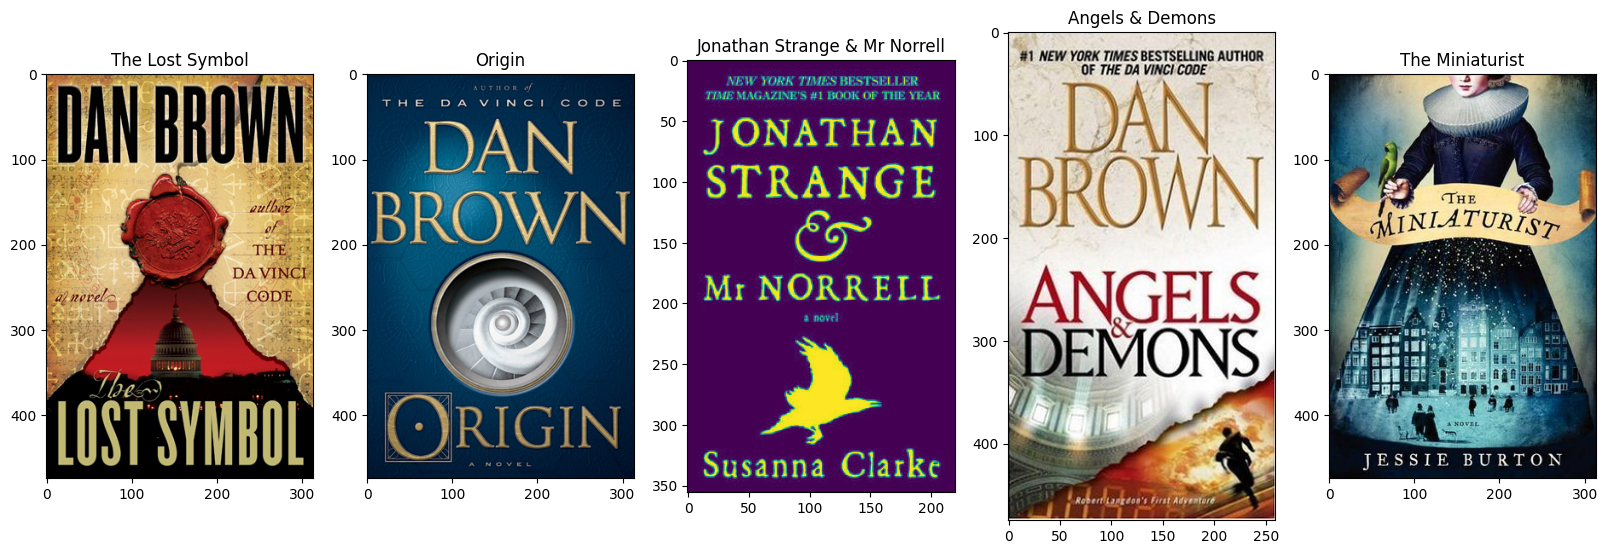

In [37]:
recommendations("The Da Vinci Code")